In [133]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
sns.set(style="whitegrid")

1. Linear regression

In [134]:
#Reading and displaying white data
white=pd.read_csv('winequality-white.csv',sep=';')
white.insert(12, "label", "w") #add a label 
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [135]:
#Read and display red data
red=pd.read_csv('winequality-red.csv',sep=';')
red.insert(12, "label", "r") #add a label
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r


In [136]:
#Combining white and red data
frames = [white, red]
combine = pd.concat(frames)
combine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


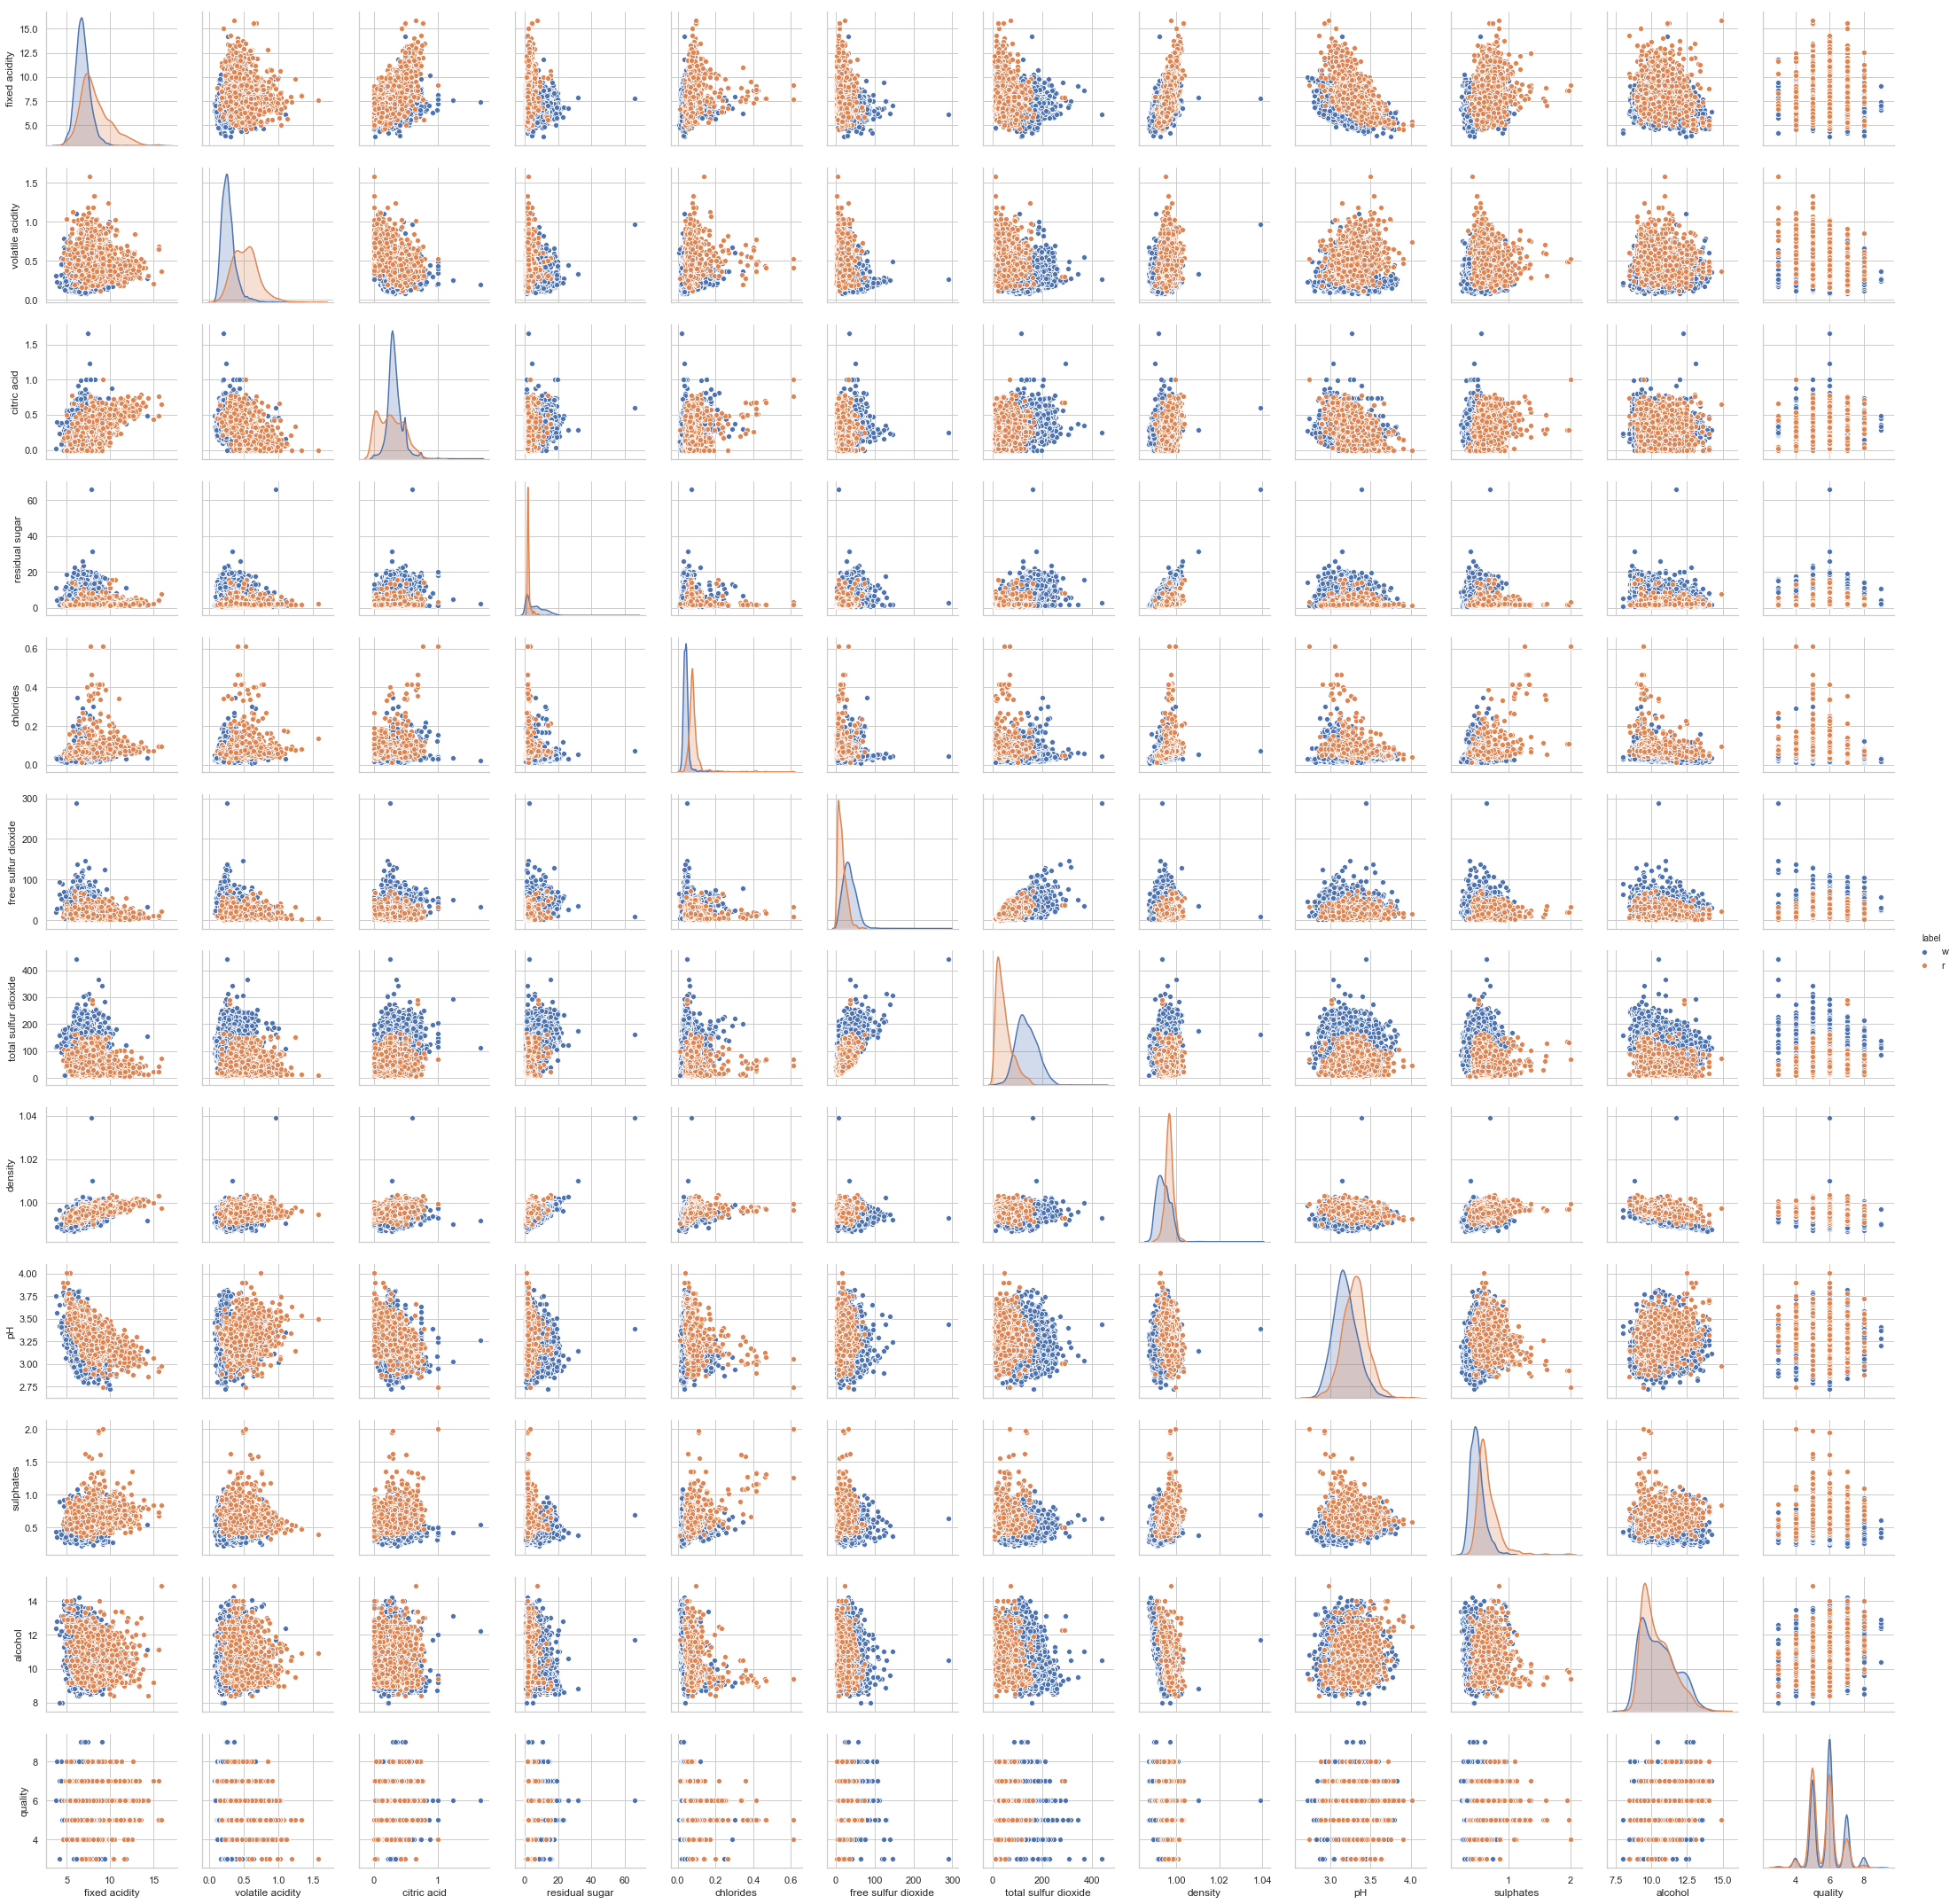

In [137]:
#visualize the data
sns.pairplot(data=combine,hue="label")

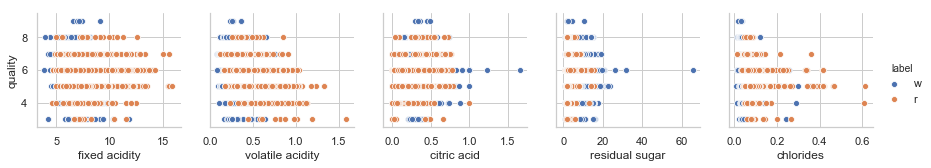

In [138]:
#visualize data against the quality variable
sns.pairplot(data=combine,x_vars=("fixed acidity","volatile acidity","citric acid","residual sugar", "chlorides"), y_vars="quality",hue="label")

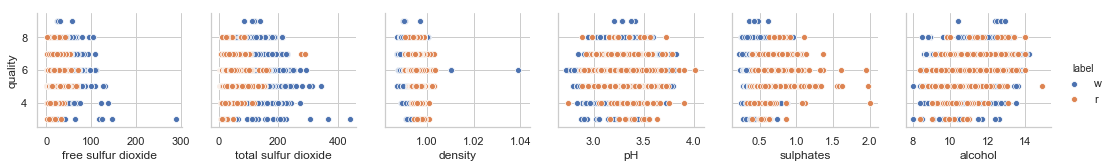

In [139]:
#visualize rest of columns against the quality variable
sns.pairplot(data=combine,x_vars=("free sulfur dioxide","total sulfur dioxide","density","pH", "sulphates","alcohol"), y_vars="quality",hue="label")

In [140]:
#Linear regression for white data
X=white.iloc[:,0:11]
y=white['quality']
ols_model = skl_lm.LinearRegression() #Model
ols_model.fit(X,y)
pred=ols_model.predict(X)
error=y-pred
sse=np.sum(error**2)
mse=mean_squared_error(y,pred)
mse #mean squared error

0.5631540629886569

In [141]:
#root mean squared
rmse = np.sqrt(mse)
rmse

0.7504359153109991

In [142]:
#R-squared
r2=ols_model.score(X,y)
r2

0.2818703641332855

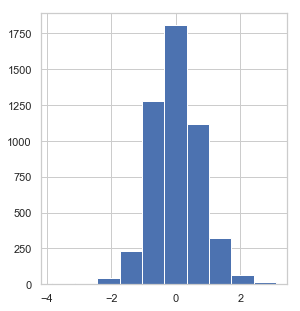

In [143]:
#Analyzing residuals
p=plt.figure(figsize=(15,5))
ax1=p.add_subplot(131)
ax1.hist(error);

In [144]:
# Regression for red data
X=red.iloc[:,0:11]
y=red['quality']
ols_model = skl_lm.LinearRegression() #Model
ols_model.fit(X,y)
pred=ols_model.predict(X)
error=y-pred
sse=np.sum(error**2)
mse=mean_squared_error(y,pred)
mse

0.41676716722140794

In [145]:
#root mean squared
rmse = np.sqrt(mse)
rmse

0.6455750670692045

In [146]:
#R-squared
r2=ols_model.score(X,y)
r2

0.36055170303868833

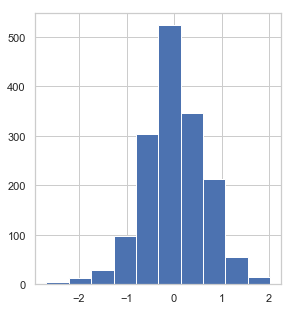

In [147]:
#Residual analysis
p=plt.figure(figsize=(15,5))
ax1=p.add_subplot(131)
ax1.hist(error);

In [148]:
#for Combined data
X=combine.iloc[:,0:11]
y=combine['quality']
ols_model = skl_lm.LinearRegression() #Model
ols_model.fit(X,y)
pred=ols_model.predict(X)
error=y-pred
sse=np.sum(error**2)
mse=mean_squared_error(y,pred)
mse

0.5397154672783369

In [149]:
#root mean squared
rmse = np.sqrt(mse)
rmse

0.7346532973303372

In [150]:
r2=ols_model.score(X,y)
r2

0.29213688504020485

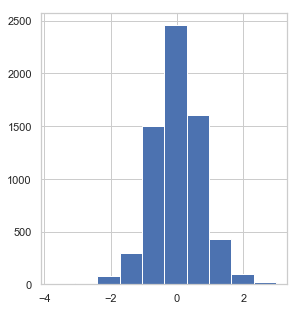

In [151]:
#residual analysis
p=plt.figure(figsize=(15,5))
ax1=p.add_subplot(131)
ax1.hist(error);


2. Logistic regression

In [152]:
#reading the data and display
haberman=pd.read_csv('haberman.csv',sep=',')
haberman.head()

,Age,Op_year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [153]:
#getting predictors and observed data
X=haberman.iloc[:,0:3]
y=haberman.iloc[:,3]

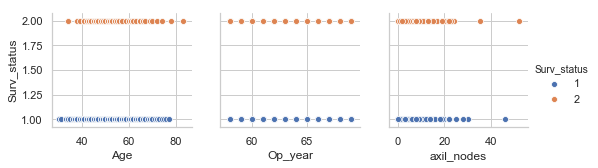

In [154]:
# visualize data against the survival status column
sns.pairplot(data=haberman,x_vars=("Age","Op_year","axil_nodes"), y_vars="Surv_status",hue="Surv_status")

In [155]:
#Logistic regression
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(X,y)
y_pred=logreg.predict(X)
print(str(logreg.coef_)+","+str(logreg.intercept_)) #coefficients and intercept

[[ 0.01988257 -0.00975411  0.08838822]],[-1.86233569]


In [156]:
#Confusion matrix
cm=pd.DataFrame(confusion_matrix(y,y_pred), index=["1","2"], columns=["1","2"])
print(cm)

     1   2
1  215  10
2   67  14


In [157]:
#Classification report
print(classification_report(y,y_pred,digits=3))

              precision    recall  f1-score   support

           1      0.762     0.956     0.848       225
           2      0.583     0.173     0.267        81

   micro avg      0.748     0.748     0.748       306
   macro avg      0.673     0.564     0.557       306
weighted avg      0.715     0.748     0.694       306

